<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Car Price Prediction using ANN</div>

#### `Importing Libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings as w
import plotly.express as px
import plotly.graph_objects as go
w.filterwarnings("ignore")
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
# import tensorflow as tf
# print(tf.__version__)
# from tensorflow.keras.datasets import CarPricesData.csv
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split,GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error

#### `Loading Data`

In [2]:
df = pd.read_csv(r'C:\Users\SachinR\Downloads\PersonalPy\Sia\DL\CarPricesData.csv')

#### `Checking the number of rows & columns present in dataframe`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1434 non-null   float64
 2   KM         1436 non-null   int64  
 3   FuelType   1432 non-null   object 
 4   HP         1436 non-null   int64  
 5   MetColor   1436 non-null   int64  
 6   Automatic  1436 non-null   int64  
 7   CC         1434 non-null   float64
 8   Doors      1436 non-null   int64  
 9   Weight     1434 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


Our dataset mostly consists of numerical columns.

#### `Checking for missing values`

In [4]:
df.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

Null Values present in Age, FuelType, CC, and Weight 

#### `Checking the number of rows & columns present in dataframe`

In [5]:
df.shape

(1436, 10)

Our dataframe has 1436 rows with 10 attributes.

#### `Check the duplicate rows` 

In [6]:
df[df.duplicated()].shape[0]

1

Only one duplicate row in Dataframe

#### Drop `Duplicates` and Reset `Index`

In [7]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(1435, 10)

After droping 1 duplicate row, got shape of 1435 rows and 10 columns in our Dataframe.

#### `See top 5 rows`

In [8]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


#### `Basic Statistics of Numerical Columns`

In [9]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
mean,10720.915679,56.020237,68571.782578,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


Looking at various statistics such as the mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum for each numerical column.

#### `Visualizing distribution of all the Categorical Predictor variables in the data using bar plots`

In [10]:
Categorical_columns = df.select_dtypes(include='O').columns
Categorical_columns

Index(['FuelType'], dtype='object')

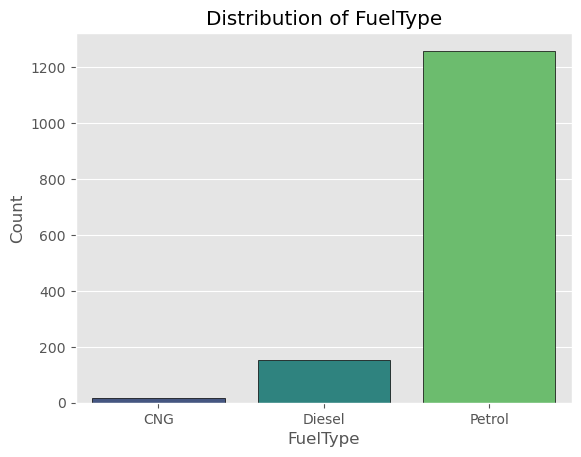

In [11]:
sns.barplot(x= Categorical_columns[0], y='Count', data=df.groupby(Categorical_columns[0]).size().reset_index(name='Count'), 
            palette='viridis', edgecolor = 'black')
plt.title(f'Distribution of {Categorical_columns[0]}')
plt.xlabel(Categorical_columns[0])
plt.show()

We only have FuelType column of category type. It has 3 unique values  - `CNG`, `Diesel` and `Petrol`

#### `Visualize distribution of all the Continuous Predictor variables in the data using histograms`

In [12]:
continuous_columns = df.select_dtypes(include='number').columns
continuous_columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight'],
      dtype='object')

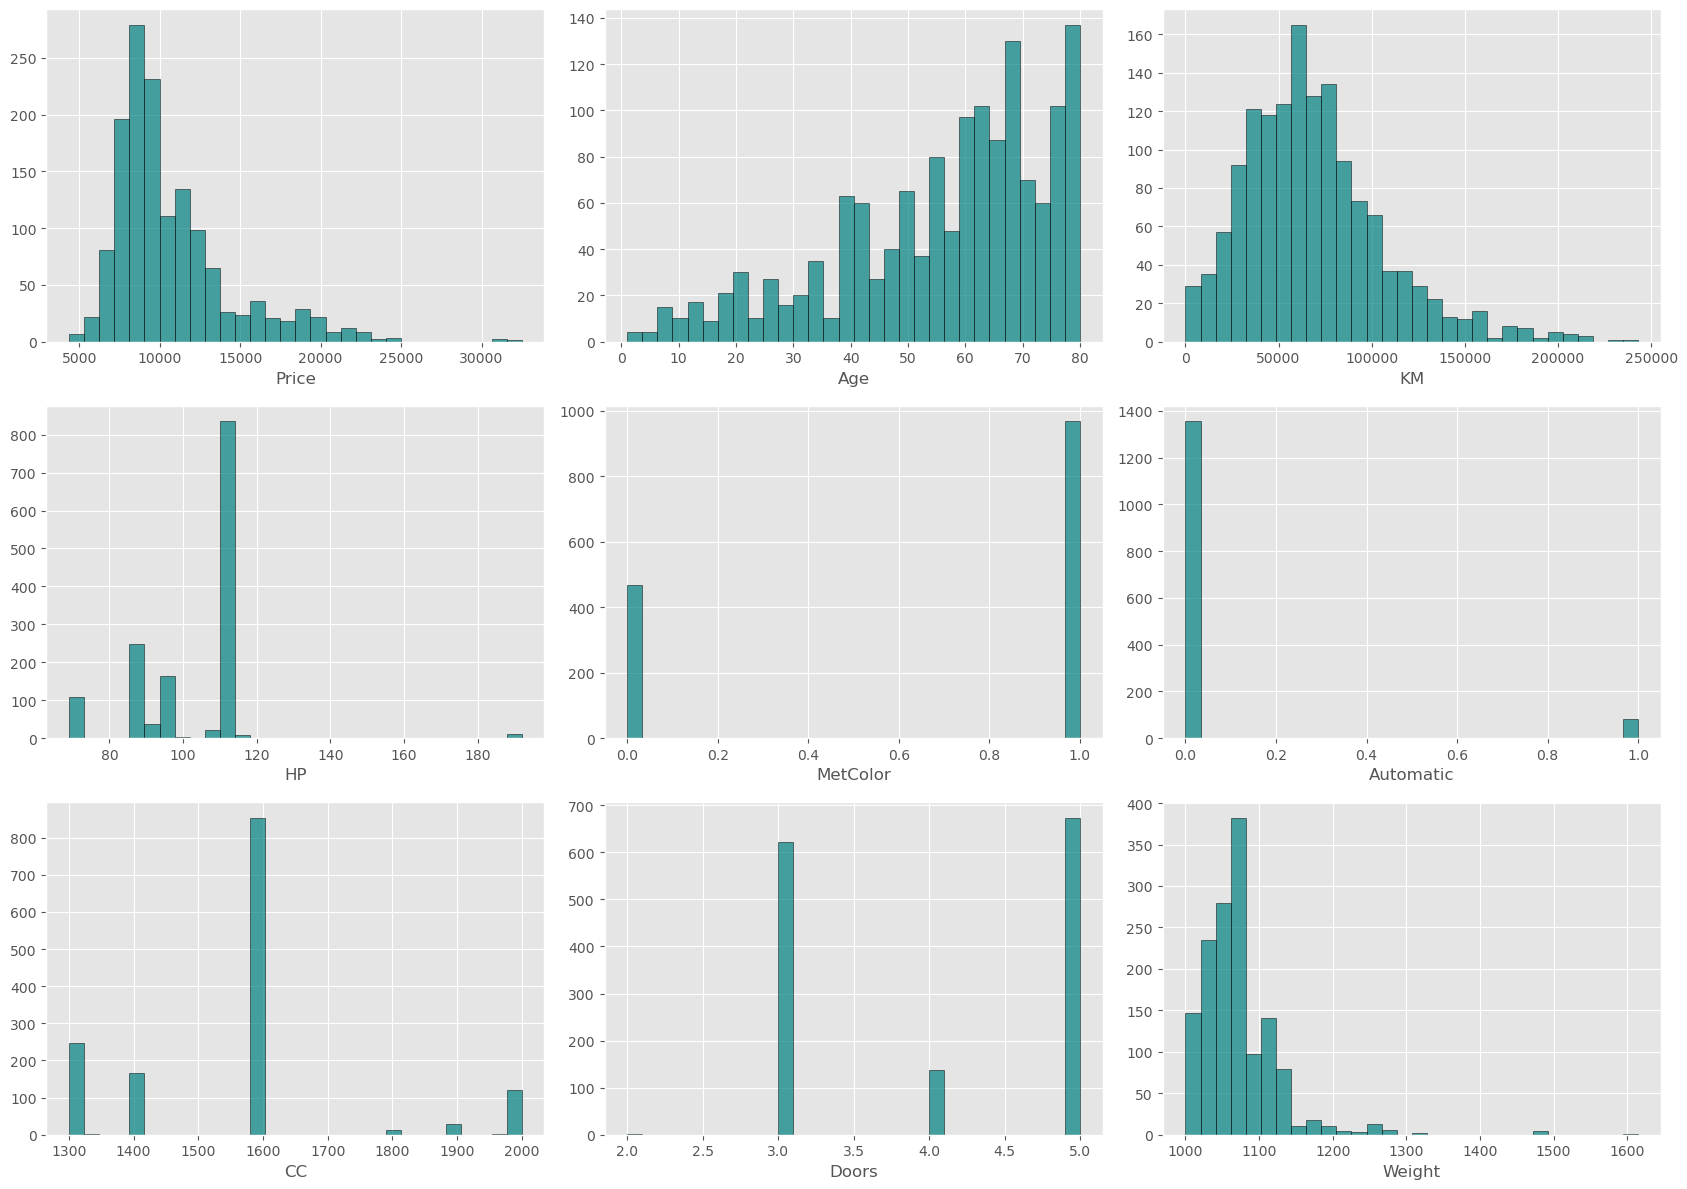

In [13]:
plt.figure(figsize=(17, 12))

# Iterate through each continuous column and create a histogram
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=30, color='teal', alpha=0.7, edgecolor='black')
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

We see the distribution of numerical features in our dataframe

#### `Find out the missing values`

In [14]:
df.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

A few features have missing values. We will handle them in the following cells

#### `Total Missing Values`

In [15]:
df.isnull().sum().sum()

10

#### `Impute missing values with Median for Continuous values`

In [16]:
null_continuous_cols =  ['Age','CC','Weight']
for i in null_continuous_cols:
    df[i] = df[i].fillna(df[i].median())
print(df.isnull().sum())

Price        0
Age          0
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64


#### `Impute missing values with Mode for Category values`

In [17]:
null_category_cols =  ['FuelType']
for i in null_category_cols:
    df[i] = df[i].fillna(df[i].mode()[0])
print(df.isnull().sum())

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64


We have `eliminated` all `null` values from our dataset

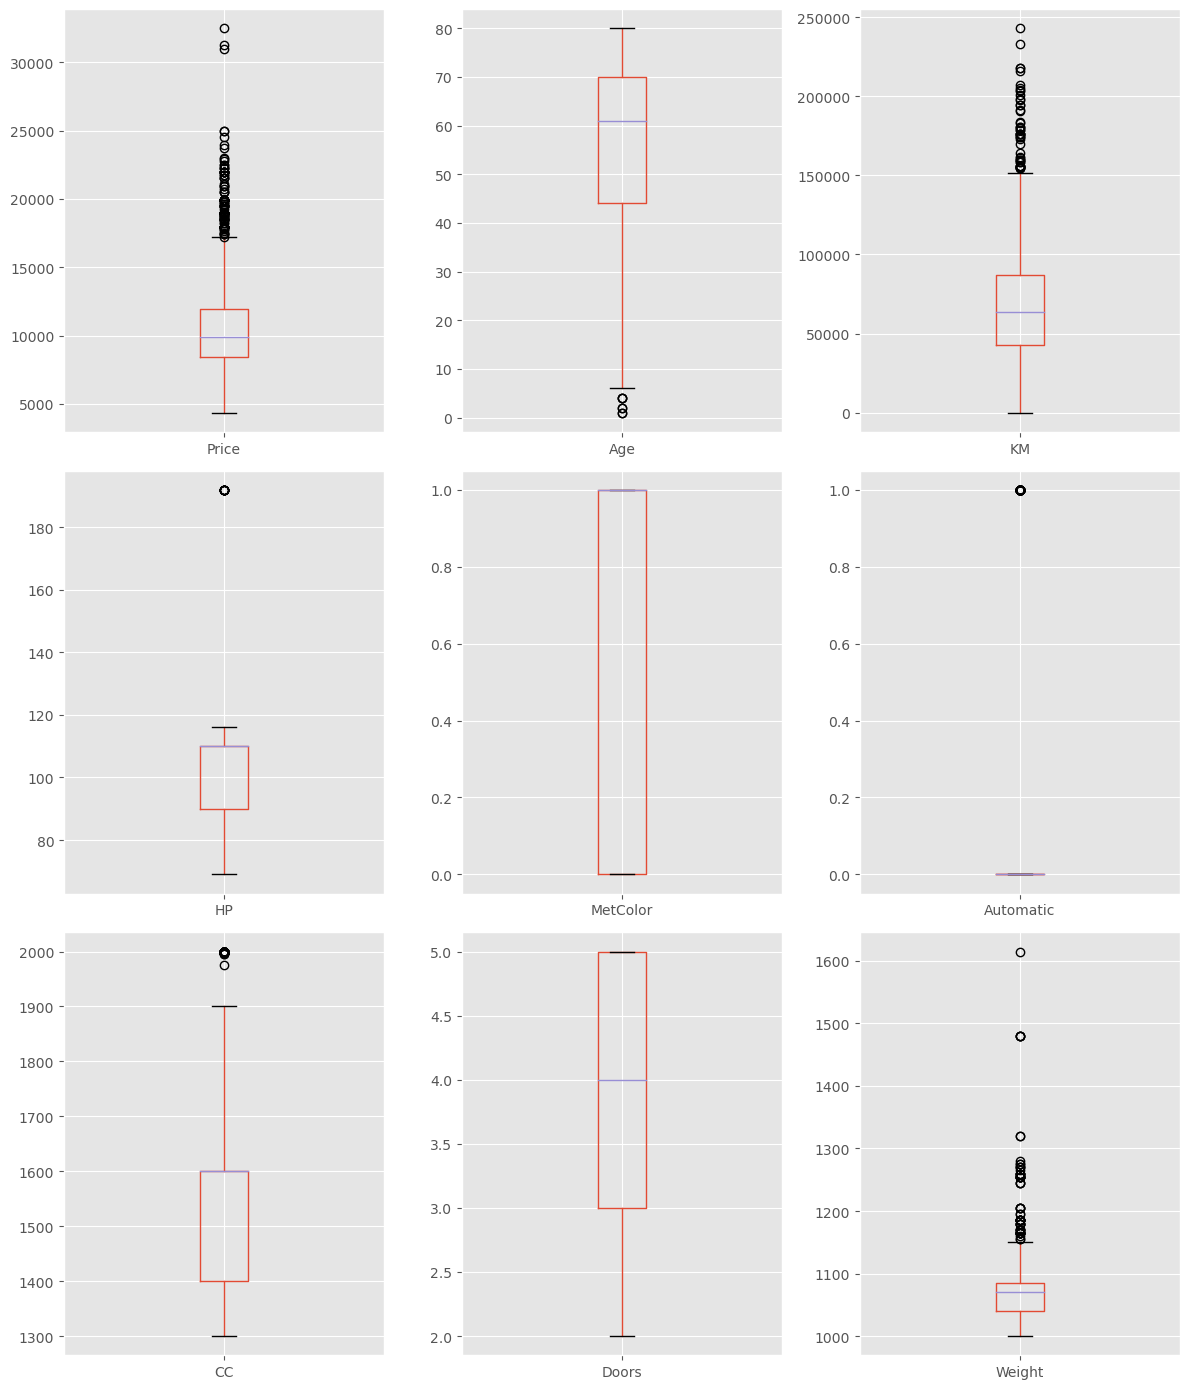

In [18]:
# Set up subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 14))
# Create boxplots for each numerical column
for ax, col in zip(axes.flatten(),continuous_columns):
    df.boxplot(column=col, ax=ax)
plt.tight_layout()
plt.show()

We notice that most of the numerical features have `outliers` 

In [19]:
# Specify the IQR factor (you can adjust this based on your requirements)
iqr_factor = 1.5
outlier_columns = ['Age', 'KM', 'Weight','HP','CC']

# Remove outliers based on IQR directly
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Removing Outliers from `Age`, `KM`, `Weight`,`HP` and `CC`

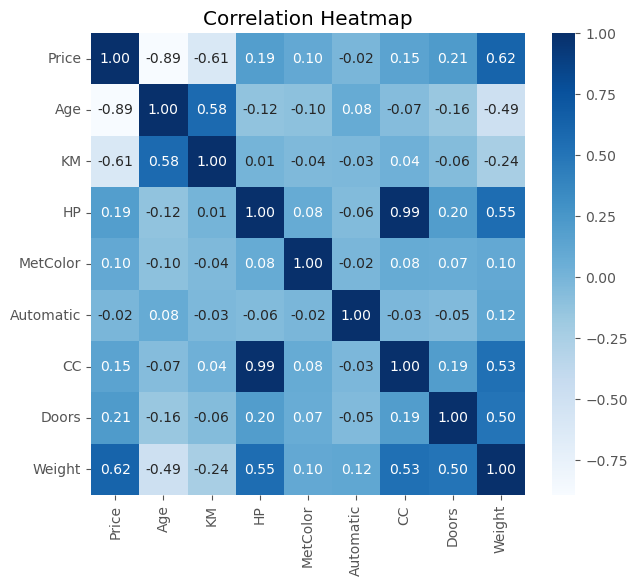

In [20]:
plt.figure(figsize=(7,6))
plt.title('Correlation Heatmap')
sns.heatmap(df[continuous_columns].corr(), annot=True,fmt = ".2f",cmap='Blues')
plt.show()

`Correlation` between all the numerical features in our dataset.

#### `Splitting data into features(x) and target(y)`

In [21]:
x = df.iloc[:,1:]
y = df['Price']

In [22]:
x.head(2)

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
17,24.0,21716,Petrol,110,1,0,1600.0,3,1105.0
18,24.0,25563,Petrol,110,0,0,1600.0,3,1065.0


In [23]:
df['FuelType'].unique()

array(['Petrol', 'CNG'], dtype=object)

In [24]:
# One-Hot encoding
x = pd.get_dummies(x, columns=['FuelType'], prefix='FuelType', drop_first=True)

In [25]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x = sc.fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [27]:
xtrain.shape

(992, 9)

In [28]:
ytrain.shape

(992,)

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.callbacks import EarlyStopping

#### Creating our ANN

In [30]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(xtrain.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),Dropout(0.3),
    Dense(64, activation = 'relu'),Dropout(0.3),
    Dense(32, activation ='relu'), Dropout(0.3),
    Dense(1)]) #Output layer for regression, no activation function

In [31]:
#Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mae'])

#train the model
model.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_split=0.2)

#Evalute the model
loss, mae = model.evaluate(xtest, ytest)
print(f"Mean Absolute Error on Test Date: {mae}")


Epoch 1/100


25/25 [==============================] - 2s 15ms/step - loss: 10499.1377 - mae: 10499.1377 - val_loss: 10270.2266 - val_mae: 10270.2266
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 10460.8232 - mae: 10460.8232 - val_loss: 10164.1602 - val_mae: 10164.1602
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 10086.1074 - mae: 10086.1074 - val_loss: 9307.8584 - val_mae: 9307.8584
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 7905.8218 - mae: 7905.8218 - val_loss: 5284.6353 - val_mae: 5284.6353
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 3681.4255 - mae: 3681.4255 - val_loss: 1842.1233 - val_mae: 1842.1233
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 2615.3940 - mae: 2615.3940 - val_loss: 1343.3903 - val_mae: 1343.3903
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 2320.3457 - mae: 2320.3457 - val_loss: 1173.7191 - val_

Epoch 54/100
25/25 [==============================] - 0s 4ms/step - loss: 1850.9768 - mae: 1850.9768 - val_loss: 805.7373 - val_mae: 805.7373
Epoch 55/100
25/25 [==============================] - 0s 4ms/step - loss: 1824.7787 - mae: 1824.7787 - val_loss: 787.8149 - val_mae: 787.8149
Epoch 56/100
25/25 [==============================] - 0s 4ms/step - loss: 1857.9196 - mae: 1857.9196 - val_loss: 803.2231 - val_mae: 803.2231
Epoch 57/100
25/25 [==============================] - 0s 4ms/step - loss: 1780.8096 - mae: 1780.8096 - val_loss: 827.5637 - val_mae: 827.5637
Epoch 58/100
25/25 [==============================] - 0s 4ms/step - loss: 1833.2412 - mae: 1833.2412 - val_loss: 951.9610 - val_mae: 951.9610
Epoch 59/100
25/25 [==============================] - 0s 4ms/step - loss: 1937.2950 - mae: 1937.2950 - val_loss: 790.4266 - val_mae: 790.4266
Epoch 60/100
25/25 [==============================] - 0s 5ms/step - loss: 1783.0157 - mae: 1783.0157 - val_loss: 789.2697 - val_mae: 789.2697
Epoch 

#### Implementing Early Stopping

In [32]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(xtrain.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, mae = model.evaluate(xtest, ytest, verbose=0)
print(f"Mean Absolute Error on Test Data: {mae}")

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 119411160.0000 - mae: 10497.6074 - val_loss: 112621328.0000 - val_mae: 10265.6475
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 118215464.0000 - mae: 10440.8604 - val_loss: 109409304.0000 - val_mae: 10112.7393
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 107511280.0000 - mae: 9930.5820 - val_loss: 86712496.0000 - val_mae: 8966.1484
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 59412600.0000 - mae: 7137.0254 - val_loss: 19159158.0000 - val_mae: 3950.4231
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 12510900.0000 - mae: 2817.0608 - val_loss: 2965037.2500 - val_mae: 1347.1959
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 9240034.0000 - mae: 2382.0676 - val_loss: 2797272.5000 - val_mae: 1310.4062
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 7977256.5000 -

#### `Hyperparameter Tuning` our ANN

In [33]:
input_dim = xtrain.shape[1]

def create_model(num_layers=1, neurons_first_layer=64, activation='relu', output_activation='linear',
                 dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons_first_layer, activation=activation, input_shape=(input_dim,)))
    
    for i in range(num_layers - 1):
        model.add(Dense(neurons_first_layer // 2, activation=activation))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation=output_activation))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error', metrics=['mae'])
    
    return model

# Define the parameter grid
param_grid = {
    'num_layers': [1, 2, 3],
    'neurons_first_layer': [64, 128],
    'activation': ['relu'],
    'output_activation': ['linear'],
    'dropout_rate': [0.3],
    'learning_rate': [0.1],
}

# Additional parameters for training
batch_size = 128
epochs = [50, 100]

# Initialize best hyperparameters and MAE
best_hyperparameters = None
best_mae = np.inf

# Iterate over the parameter grid using ParameterGrid
for params in ParameterGrid(param_grid):
    for num_epochs in epochs:
        # Create the model with current hyperparameters
        model = create_model(**params)

        # Train the model
        model.fit(xtrain, ytrain, epochs=num_epochs, batch_size=batch_size, verbose=0)

        # Evaluate the model on the validation set
        y_pred = model.predict(xtest)
        current_mae = mean_absolute_error(ytest, y_pred)

        # Print the result for the current hyperparameters
        print(f"Hyperparameters: {params}, Epochs: {num_epochs}, Test MAE: {current_mae}\n")

        # Update best hyperparameters if the current result is better
        if current_mae < best_mae:
            best_mae = current_mae
            best_hyperparameters = {**params, 'epochs': num_epochs}

# Print the best hyperparameters and corresponding MAE
print("\n\nBest Hyperparameters:", best_hyperparameters)
print("\n\nBest Mean Absolute Error:", best_mae)

8/8 [==============================] - 0s 2ms/step
Hyperparameters: {'activation': 'relu', 'dropout_rate': 0.3, 'learning_rate': 0.1, 'neurons_first_layer': 64, 'num_layers': 1, 'output_activation': 'linear'}, Epochs: 50, Test MAE: 847.5874358146422

8/8 [==============================] - 0s 2ms/step
Hyperparameters: {'activation': 'relu', 'dropout_rate': 0.3, 'learning_rate': 0.1, 'neurons_first_layer': 64, 'num_layers': 1, 'output_activation': 'linear'}, Epochs: 100, Test MAE: 795.3880654611895

8/8 [==============================] - 0s 2ms/step
Hyperparameters: {'activation': 'relu', 'dropout_rate': 0.3, 'learning_rate': 0.1, 'neurons_first_layer': 64, 'num_layers': 2, 'output_activation': 'linear'}, Epochs: 50, Test MAE: 949.1640093403478

8/8 [==============================] - 0s 2ms/step
Hyperparameters: {'activation': 'relu', 'dropout_rate': 0.3, 'learning_rate': 0.1, 'neurons_first_layer': 64, 'num_layers': 2, 'output_activation': 'linear'}, Epochs: 100, Test MAE: 936.274949596

#### MAE of ML Models

Checking the MAE using ML models

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


# 1. Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(xtrain, ytrain)
y_pred_rf = rf_model.predict(xtest)
mae_rf = mean_absolute_error(ytest, y_pred_rf)
print("MAE (Random Forest):", mae_rf)

# 2. XGBoost
xgboost_model = XGBRegressor()
xgboost_model.fit(xtrain, ytrain)
y_pred_xgboost = xgboost_model.predict(xtest)
mae_xgboost = mean_absolute_error(ytest, y_pred_xgboost)
print("MAE (XGBoost):", mae_xgboost)

# 3. Support Vector Machines (SVM)
svm_model = SVR()
svm_model.fit(xtrain, ytrain)
y_pred_svm = svm_model.predict(xtest)
mae_svm = mean_absolute_error(ytest, y_pred_svm)
print("MAE (SVM):", mae_svm)

# 4. K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(xtrain, ytrain)
y_pred_knn = knn_model.predict(xtest)
mae_knn = mean_absolute_error(ytest, y_pred_knn)
print("MAE (KNN):", mae_knn)

# 5. Linear Regression
linear_model = LinearRegression()
linear_model.fit(xtrain, ytrain)
y_pred_linear = linear_model.predict(xtest)
mae_linear = mean_absolute_error(ytest, y_pred_linear)
print("MAE (Linear Regression):", mae_linear)

MAE (Random Forest): 753.4154685099847
MAE (XGBoost): 823.7350522933468
MAE (SVM): 2242.976096560223
MAE (KNN): 874.4185483870967
MAE (Linear Regression): 864.9629800464968


`ML Models` outperform `ANN` because our dataset is `small` and ML models favour `less complex datasets`.